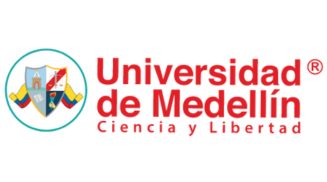

#**ESPECIALIZACIÓN EN CIENCIA DE DATOS E INTELIGENCIA ARTIFICIAL**

#*Introducción a la ciencia de datos*

# Proyecto Final: Análisis Exploratorio de Transacciones Financieras en Línea

Prof. : David Palacio Jiménez

Est. :  Eloisa Cardona Botero - Simón Callejas Pérez - Luisa Fernanda Escobar Gutiérrez

# **Descripción del proyecto**

El proyecto final del curso consiste en desarrollar un análisis exploratorio exhaustivo de un dataset que
contiene información de transacciones financieras en línea. En este conjunto de datos se registran detalles
como el monto de la transacción, los saldos previos y posteriores a la operación, y la detección de
transacciones fraudulentas. Este escenario simulado corresponde al entorno operativo de una entidad
financiera o sistema de pagos en línea, lo cual lo convierte en un caso de estudio ideal para abordar temas
de seguridad y detección de fraudes.

**Problema a Abordar**

El objetivo principal es identificar patrones que permitan diferenciar entre transacciones legítimas y
fraudulentas. Además, se plantea el desarrollo de un modelo predictivo basado en las variables del dataset
que ayude a predecir la probabilidad de que una transacción sea fraudulenta.


**Descripción de las Variables**
* step: Unidad de tiempo (1 step equivale a 1 hora).
* type: Tipo de transacción en línea.
* amount: Monto de la transacción.
* nameOrig: Cliente que inicia la transacción.
* oldbalanceOrg: Saldo del cliente antes de la transacción.
* newbalanceOrig: Saldo del cliente después de la transacción.
* nameDest: Destinatario de la transacción.
* oldbalanceDest: Saldo inicial del destinatario antes de la transacción.
* newbalanceDest: Nuevo saldo del destinatario después de la transacción.
* isFraud: Indicador de transacción fraudulenta (marcado como 1 si es fraudulenta).
* isFlaggedFraud: Indicador de transacción marcada por un sistema de alerta.

**Entregables del Proyecto**
El estudiante debe entregar un análisis exploratorio integral que incluya, pero no se limite a:
* Análisis Inicial: Identificación del tipo de datos, cantidad de registros y análisis de relaciones entre
variables.
* Visualizaciones: Creación de histogramas, gráficos de barras y series temporales (aprovechando
la variable step).
* Preprocesamiento: Limpieza y transformación de datos, incluyendo el tratamiento de valores
nulos o inconsistentes.
* Análisis Avanzado: Elaboración de matrices de correlación y gráficos interactivos que permitan
extraer información relevante.
* Conclusiones: Una sección final que sintetice los hallazgos del análisis.

**Nota Adicional:**
Aunque el enfoque principal es el análisis exploratorio, se valorará positivamente el desarrollo de un modelo predictivo para la detección de transacciones fraudulentas, dado que se trata de un problema
de clasificación. Se espera que el trabajo haga uso de las librerías vistas en el curso, tales como NumPy,
Pandas, Polars, SciPy, Plotly, seaborn, entre otras.

**El trabajo deberá ser entregado en un Notebook. Puede ser montado
en el aula virtual o subirlo a un repositorio en GitHub.**

# **Importación de librerías**

In [ ]:
# Manipulación de datos
import pandas as pd
import numpy as np
import polars as pl
#from google.colab import drive
#drive.mount('/content/drive')

# Obtención de gráficas
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests
from scipy.stats import norm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Libreria de calculos estadisticos
import scipy.stats as st
from scipy import stats
import statsmodels.api as sm


Mounted at /content/drive


# **Carga de Datos:**

In [ ]:
# LAS SIGUIENTES 2 LÍNEAS MUESTRAN DE MEJOR MANERA EL DATAFRAME AL HACER "PRINT" O "HEAD"
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Subir archivo desde googledrive
fraud_detection = pd.read_parquet('data/fraud-detection.parquet')
fraud_detection.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1.0,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1.0,0.0
3,1.0,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1.0,0.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
print(fraud_detection.shape)

(6362620, 11)


In [ ]:
fraud_detection.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  float64
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  object 
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  object 
 5   newbalanceOrig  6362620 non-null  object 
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  object 
 8   newbalanceDest  6362620 non-null  object 
 9   isFraud         6362620 non-null  float64
 10  isFlaggedFraud  6362620 non-null  float64
dtypes: float64(3), object(8)
memory usage: 534.0+ MB


In [ ]:
print(fraud_detection.describe())

               step       isFraud  isFlaggedFraud
count  6.362620e+06  6.362620e+06    6.362620e+06
mean   2.433972e+02  1.290820e-03    2.514687e-06
std    1.423320e+02  3.590480e-02    1.585775e-03
min    1.000000e+00  0.000000e+00    0.000000e+00
25%    1.560000e+02  0.000000e+00    0.000000e+00
50%    2.390000e+02  0.000000e+00    0.000000e+00
75%    3.350000e+02  0.000000e+00    0.000000e+00
max    7.430000e+02  1.000000e+00    1.000000e+00


# **Transformación y estandarización de tipos de datos**

In [ ]:
# Cambio de tipo de variable de Objectr(str) a Numericas(float)
fraud_detection["oldbalanceOrg"] = fraud_detection["oldbalanceOrg"].astype(float)
fraud_detection["newbalanceOrig"] = fraud_detection["newbalanceOrig"].astype(float)
fraud_detection["oldbalanceDest"] = fraud_detection["oldbalanceDest"].astype(float)
fraud_detection["newbalanceDest"] = fraud_detection["newbalanceDest"].astype(float)
fraud_detection["amount"] = fraud_detection["amount"].astype(float)

# Cambiar de tipo de variable de Objectr(str) a Categorica(str)
fraud_detection["type"] = fraud_detection["type"].astype("category")

# Cambio de tipo de variable de float64 a Boleana(bool)
fraud_detection["isFraud"] = fraud_detection["isFraud"].astype(bool)

# Cambio de nombre de variable "newbalanceOrig" por "newbalanceOrg"
fraud_detection.rename(columns={"newbalanceOrig": "newbalanceOrg"}, inplace=True)

fraud_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            float64 
 1   type            category
 2   amount          float64 
 3   nameOrig        object  
 4   oldbalanceOrg   float64 
 5   newbalanceOrg   float64 
 6   nameDest        object  
 7   oldbalanceDest  float64 
 8   newbalanceDest  float64 
 9   isFraud         bool    
 10  isFlaggedFraud  float64 
dtypes: bool(1), category(1), float64(7), object(2)
memory usage: 449.0+ MB


### **Argumentación para la limpieza de la variable isFlaggedFraud**

In [ ]:
isflagged_info = fraud_detection[fraud_detection['isFlaggedFraud'] == 1].shape[0]
print(isflagged_info)

16


### **Observación**

La variable **isFlaggedFraud** contiene solo 16 casos marcados como fraude, en comparación con la gran cantidad de datos del DataFrame fraud_detection. Con tan poca información, no aporta valor al entrenamiento y podría incluso sesgar el modelo, por lo que se decidió eliminarla.

In [ ]:
# Drop de isFlaggedFraud
fraud_detection = fraud_detection.drop('isFlaggedFraud', axis=1)
fraud_detection.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrg',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

## **Nuevas columnas para análisis de la variable "amount"**

Se construyeron nuevas columnas para verificar la variable **amount**, calculando la diferencia entre el saldo final e inicial tanto del destinatario como del origen. Esto se realizó con el fin de comprobar si las transacciones fueron correctas y detectar posibles anomalías.

In [ ]:
# Imprimir df con la nueva columna amount_dest
fraud_detection["amount_dest"] = fraud_detection["newbalanceDest"] - fraud_detection["oldbalanceDest"]
fraud_detection["amount_org"] = fraud_detection["oldbalanceOrg"] - fraud_detection["newbalanceOrg"]

# Imprimir df con la nueva columna amont_val_org
fraud_detection["amount_val_org"] = (fraud_detection["amount"] == fraud_detection["amount_org"])
fraud_detection["amount_val_org"] = fraud_detection["amount_val_org"].astype(bool)

# Imprimir df con la nueva columna amont_val_dest
fraud_detection["amount_val_dest"] = (fraud_detection["amount"] == fraud_detection["amount_dest"])
fraud_detection["amount_val_dest"] = fraud_detection["amount_val_dest"].astype(bool)

# # Crear columna que indica si ambas validaciones son correctas (amount_val_org y amount_val_dest)
fraud_detection["amount_val"]= (fraud_detection["amount_val_org"] & fraud_detection["amount_val_dest"])
fraud_detection["amount_val"] = fraud_detection["amount_val"].astype(bool)

fraud_detection.head()
print(fraud_detection.info(), "\n")
print(fraud_detection.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column           Dtype   
---  ------           -----   
 0   step             float64 
 1   type             category
 2   amount           float64 
 3   nameOrig         object  
 4   oldbalanceOrg    float64 
 5   newbalanceOrg    float64 
 6   nameDest         object  
 7   oldbalanceDest   float64 
 8   newbalanceDest   float64 
 9   isFraud          bool    
 10  amount_dest      float64 
 11  amount_org       float64 
 12  amount_val_org   bool    
 13  amount_val_dest  bool    
 14  amount_val       bool    
dtypes: bool(4), category(1), float64(8), object(2)
memory usage: 515.8+ MB
None 

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrg     nameDest  oldbalanceDest  newbalanceDest  isFraud  amount_dest  amount_org  amount_val_org  amount_val_dest  amount_val
0   1.0   PAYMENT   9839.64  C1231006815       170136.0      160296.36  M197978715

## **Gráficos de validacion y analisis de la variable Amount con respecto su Origen y Destino**

In [ ]:
# Histograma 1 para amount_val
fig_hist_amount_val = px.histogram(fraud_detection, x="amount_val",
                                 title="Histograma de frecuencia Amount verificado",
                                 labels={"x": "Amount verificado", "y": "Frecuencia"},
                                 color_discrete_sequence=["steelblue"]  )

# Histograma 2 para amount_val_org
fig_hist_amount_val_org = px.histogram(fraud_detection, x="amount_val_org",
                                     title="Histograma de frecuencia Amount verificado Origen",
                                     color_discrete_sequence=["darkorange"],
                                     labels={"x": "Amount Origen", "y": "Frecuencia"})

# Histograma 3 para amount_val_dest
fig_hist_amount_amount_val_dest = px.histogram(fraud_detection, x="amount_val_dest",
                                           title="Histograma de frecuencia Amount verificado Destino",
                                           color_discrete_sequence=["seagreen"],
                                           labels={"x": "Amount Destino", "y": "Frecuencia"})


fig = make_subplots(rows=1, cols=3, specs=[[{"type": "xy"}, {"type": "xy"}, {"type": "xy"}]],
                    subplot_titles=("Amount General", "Amount Origen", "Amount Destino"))

# Agregamos los histo
fig.add_trace(fig_hist_amount_val.data[0], row=1, col=1)
fig.add_trace(fig_hist_amount_val_org.data[0], row=1, col=2)
fig.add_trace(fig_hist_amount_amount_val_dest.data[0], row=1, col=3)

# Titulos y fig.update
fig.update_layout(height=500, width=1200, title_text="Verificación de Transacciones por Origen, Destino y Amount")

# Actualizamos ejes
fig.update_xaxes(title_text="Valor", row=1, col=1)
fig.update_xaxes(title_text="Valor", row=1, col=2)
fig.update_xaxes(title_text="Valor", row=1, col=3)

fig.update_yaxes(title_text="Frecuencia", row=1, col=1)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

### **Observación**

Los gráficos muestran la coincidencia entre el valor de amount y las variables de saldo inicial y final (old/new) tanto del origen como del destino. Idealmente, la resta entre los saldos finales e iniciales debería ser igual al valor de amount, ya que este representa el monto de la transacción.

Sin embargo, esto no se cumple en la mayoría de los casos. La variable amount_val_org evalúa cuántos de los registros del balance de origen coinciden con amount. En este caso, solo 440.511 (7%) coinciden, mientras que 5.922.109 (93%) no lo hacen.

De manera similar, la variable amount_val_dest evalúa las coincidencias en los balances del destino, donde 760.630 (12%) coinciden y 5.602.260 (88%) no coinciden.

Por último, la variable amount_val considera ambas verificaciones anteriores, permitiendo identificar los casos más consistentes, es decir, aquellos donde tanto el saldo del origen como el del destino coinciden con la cantidad transferida. Solo 60.035 registros (0,9%) cumplen esta condición, mientras que 6.302.585 (casi el 99%) no lo hacen.

Estos resultados evidencian una muy baja consistencia y calidad en los datos.

### **Argumentación para la limpieza de las variables nameorig, nameDest**

In [ ]:
# hay clientes que se repiten en ambos roles de nameOrig y nameDest?

common_isin_orig = fraud_detection[fraud_detection['nameOrig'].isin(fraud_detection['nameDest'])]
common_isin_dest = fraud_detection[fraud_detection['nameDest'].isin(fraud_detection['nameOrig'])]

print(f'Hay {len(common_isin_orig)}, clientes que se repiten en ambos roles de nameOrig y nameDest')
print(f'Hay {len(common_isin_dest)}, clientes que se repiten en ambos roles de nameDest y nameOrig')

# De esos clientes que se repiten en una u otra variable, alguno esta con isFraud?

common_isin_orig_fraud = common_isin_orig[common_isin_orig['isFraud'] == 1]
common_isin_dest_fraud = common_isin_dest[common_isin_dest['isFraud'] == 1]

print('\n*********************************************************************\n')

print(f'Hay {len(common_isin_orig_fraud)}, clientes que se repiten en ambos roles de nameOrig y nameDest y tienen isFraud')
print(f'Hay {len(common_isin_dest_fraud)}, clientes que se repiten en ambos roles de nameDest y nameOrig y tienen isFraud')

Hay 1771, clientes que se repiten en ambos roles de nameOrig y nameDest
Hay 13308, clientes que se repiten en ambos roles de nameDest y nameOrig

*********************************************************************

Hay 0, clientes que se repiten en ambos roles de nameOrig y nameDest y tienen isFraud
Hay 18, clientes que se repiten en ambos roles de nameDest y nameOrig y tienen isFraud


### **Observación**

Las variables **nameOrig** y **nameDest** no presentan una relación significativa con la variable **isFraud**. Solo 18 valores están asociados a casos de fraude, lo que representa un aporte estadístico muy débil. Por esta razón, dichas variables no resultan útiles para el entrenamiento del modelo y se decidió descartarlas.

In [ ]:
# Drop de nameOrig y nameDest
fraud_detection = fraud_detection.drop(['nameOrig', 'nameDest'], axis=1)
fraud_detection.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrg',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'amount_dest',
       'amount_org', 'amount_val_org', 'amount_val_dest', 'amount_val'],
      dtype='object')

### **Tratamiento de valores nulos o inconsistentes**



In [ ]:
# Revisamos si tenemos valores nulos
fraud_detection.isna().sum()

,0
step,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrg,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0
amount_dest,0
amount_org,0


Se observa que no hay valores nulos, por lo que no se requiere imputación de datos.

In [ ]:
# Revisamos registros duplicados
print(fraud_detection.duplicated().sum())

543


Al realizar el análisis de datos duplicados, se identificaron 543 registros repetidos, por lo que se procede a revisar una muestra aleatoria de dichos registros.

In [ ]:
# Ver solo una muestra de los duplicados
duplicados_sample = fraud_detection[fraud_detection.duplicated(keep=False)].head(20)
duplicados_sample

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,amount_dest,amount_org,amount_val_org,amount_val_dest,amount_val
10884,7.0,PAYMENT,1849.50,0.0,0.0,0.0,0.0,False,0.0,0.0,False,False,False
11104,7.0,PAYMENT,1849.50,0.0,0.0,0.0,0.0,False,0.0,0.0,False,False,False
27043,8.0,PAYMENT,7759.31,0.0,0.0,0.0,0.0,False,0.0,0.0,False,False,False
33556,8.0,PAYMENT,7759.31,0.0,0.0,0.0,0.0,False,0.0,0.0,False,False,False
37594,9.0,PAYMENT,6755.57,0.0,0.0,0.0,0.0,False,0.0,0.0,False,False,False
40879,9.0,PAYMENT,10042.85,0.0,0.0,0.0,0.0,False,0.0,0.0,False,False,False
48847,9.0,PAYMENT,2783.83,0.0,0.0,0.0,0.0,False,0.0,0.0,False,False,False
51253,9.0,PAYMENT,2388.93,0.0,0.0,0.0,0.0,False,0.0,0.0,False,False,False
56420,9.0,PAYMENT,6499.28,0.0,0.0,0.0,0.0,False,0.0,0.0,False,False,False
59969,9.0,PAYMENT,2388.93,0.0,0.0,0.0,0.0,False,0.0,0.0,False,False,False


In [ ]:
# Eliminar duplicados manteniendo solo la primera ocurrencia
fraud_detection = fraud_detection.drop_duplicates()

# Verificar que se eliminaron correctamente
print(f"Duplicados restantes: {fraud_detection.duplicated().sum()}")
print(f"Total de registros después de limpiar: {len(fraud_detection)}")

Duplicados restantes: 0
Total de registros después de limpiar: 6362077


Se decide eliminar los registros duplicados para mejorar la consistencia y calidad del dataset, además de reducir el ruido al momento de construir el modelo. Como resultado, el dataset pasa de 6.362.620 a 6.362.077 registros.

# **Creación Muestreo representativo**

Se crea una muestra representativa a partir de los 6 millones de registros originales, con el fin de realizar posteriormente los gráficos.

In [ ]:
def muestreo_hibrido(df, n_samples=40000):
    """
    Muestreo que preserva valores altos en saldos y montos
    """
    # Todos los fraudes - SIN DIVIDIR
    fraudes = df[df['isFraud'] == True]
    fraudes_sample = fraudes

    print(f"Fraudes encontrados: {len(fraudes):,} - Tomando todos")

    # No fraudes
    no_fraudes = df[df['isFraud'] == False]
    no_fraudes_temp = no_fraudes.copy()

    # ESTRATEGIA 1: Tomar valores extremos (altos) de saldos y montos
    # Top 5% de cada variable importante
    top_amount = no_fraudes_temp['amount'].quantile(0.95)
    top_old_org = no_fraudes_temp['oldbalanceOrg'].quantile(0.95)
    top_new_org = no_fraudes_temp['newbalanceOrg'].quantile(0.95)
    top_old_dest = no_fraudes_temp['oldbalanceDest'].quantile(0.95)

    # Seleccionar transacciones con valores altos
    valores_altos = no_fraudes_temp[
        (no_fraudes_temp['amount'] >= top_amount) |
        (no_fraudes_temp['oldbalanceOrg'] >= top_old_org) |
        (no_fraudes_temp['newbalanceOrg'] >= top_new_org) |
        (no_fraudes_temp['oldbalanceDest'] >= top_old_dest)
    ]

    print(f"Transacciones con valores altos: {len(valores_altos):,}")

    # ESTRATEGIA 2: Muestreo estratificado del resto
    resto_no_fraudes = no_fraudes_temp[~no_fraudes_temp.index.isin(valores_altos.index)]

    # Crear estratos para el resto
    resto_no_fraudes['amount_range'] = pd.qcut(resto_no_fraudes['amount'],
                                              q=5, labels=['muy_bajo', 'bajo', 'medio', 'alto', 'muy_alto']).astype(str)
    resto_no_fraudes['strata'] = resto_no_fraudes['type'].astype(str) + '_' + resto_no_fraudes['amount_range']

    # Calcular muestras disponibles
    muestras_para_valores_altos = min(len(valores_altos), n_samples // 10)  # 10% para valores altos
    remaining_samples = n_samples - len(fraudes_sample) - muestras_para_valores_altos

    print(f"Muestras para valores altos: {muestras_para_valores_altos:,}")
    print(f"Muestras restantes para estratos: {remaining_samples:,}")

    # Tomar muestra de valores altos
    valores_altos_sample = valores_altos.sample(n=muestras_para_valores_altos, random_state=42)

    # Muestreo estratificado del resto
    resto_sample = resto_no_fraudes.groupby('strata', group_keys=False).apply(
        lambda x: x.sample(min(len(x), max(1, remaining_samples // resto_no_fraudes['strata'].nunique())),
                          random_state=42)
    ).drop(['amount_range', 'strata'], axis=1)

    # Combinar TODAS las muestras
    final_sample = pd.concat([fraudes_sample, valores_altos_sample, resto_sample])

    print(f"Muestra total antes del shuffle: {len(final_sample):,}")

    return final_sample.sample(n=min(len(final_sample), n_samples), random_state=42)

# Aplicar el muestreo
sample_hibrido = muestreo_hibrido(fraud_detection, n_samples=35000)

print(f"\nRESULTADOS:")
print(f"Muestra híbrida: {len(sample_hibrido):,}")
print(f"Fraudes: {sample_hibrido['isFraud'].sum():,} ({sample_hibrido['isFraud'].mean()*100:.2f}%)")

# Verificar que se preservaron valores altos
print(f"\nVerificación de valores altos:")
print(f"Monto máximo original: ${fraud_detection['amount'].max():,.0f}")
print(f"Monto máximo en muestra: ${sample_hibrido['amount'].max():,.0f}")
print(f"Saldo máximo original: ${fraud_detection['oldbalanceOrg'].max():,.0f}")
print(f"Saldo máximo en muestra: ${sample_hibrido['oldbalanceOrg'].max():,.0f}")

Fraudes encontrados: 8,213 - Tomando todos
Transacciones con valores altos: 871,526


/tmp/ipython-input-3724387704.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-3724387704.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Muestras para valores altos: 3,500
Muestras restantes para estratos: 23,287


/tmp/ipython-input-3724387704.py:51: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Muestra total antes del shuffle: 32,251

RESULTADOS:
Muestra híbrida: 32,251
Fraudes: 8,213 (25.47%)

Verificación de valores altos:
Monto máximo original: $92,445,517
Monto máximo en muestra: $35,693,812
Saldo máximo original: $59,585,040
Saldo máximo en muestra: $59,585,040


### **Observación**

La muestra es representativa: del total de 6 millones de registros originales se redujo significativamente el volumen, preservando los 8,213 casos de fraude (25.47%) y las transacciones legítimas con montos y saldos altos. Esto permitirá generar gráficos más claros y manejables.

# **Análisis de variables**

## **Variable Type**


### **Frecuencia de variable Type**

In [ ]:
# Frecuencia absoluta de los tipos de transaccion
frecuencia_type = fraud_detection["type"].value_counts()
print("Frecuencia absoluta: \n", frecuencia_type, "\n")

# Frecuencia relativa de los tipos de transacciones
frecuencia_relativa_type = fraud_detection["type"].value_counts(normalize= True) * 100
print("Frecuencia relativa: \n", frecuencia_relativa_type, "\n")

Frecuencia absoluta: 
 type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64 

Frecuencia relativa: 
 type
CASH_OUT    35.166331
PAYMENT     33.814608
CASH_IN     21.992261
TRANSFER     8.375622
DEBIT        0.651178
Name: proportion, dtype: float64 



### **Visualizacion de tablas de frecuencia de variable Type**

In [ ]:
# Histograma
fig_hist = px.histogram(fraud_detection, x="type",
                        title="Histograma de frecuencia tipos de transaccion",
                        labels={"type": "Tipo", "count": "Frecuencia"},
                      )

# Grafico de torta
df_pie = frecuencia_type.reset_index()
df_pie.columns = ['Tipo de Transferencia', 'Frecuencia']

fig_pie = px.pie(df_pie,
                 values='Frecuencia',
                 names='Tipo de Transferencia',
                 title="Distribucion de tipo de transferencia"
                 )
fig_pie.update_traces(textinfo='percent+label',
                      textposition='inside')

# Combinar los graficos en subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {"type": "domain"}]])

# Agregar el histograma
fig.add_trace(fig_hist.data[0], row=1, col=1)

# Agregar el grafico de torta
fig.add_trace(fig_pie.data[0], row=1, col=2)

# Titulos y ajustes
fig.update_layout(height=500, width=1200, title_text="Transferencias por tipo de cuenta")
fig.update_xaxes(title_text="Type", row=1, col=1)
fig.update_yaxes(title_text="Frecuencia", row=1, col=1)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

### **Observación**

El conjunto de datos revela que las transacciones de **CASH_OUT** y **PAYMENT** son las más frecuentes, representando en conjunto casi el 70% del total de operaciones. Específicamente, **CASH_OUT** es el tipo de transacción más común, con una frecuencia absoluta de 2,237,500 casos, lo que equivale al 35.2% del total. Le sigue de cerca **PAYMENT**, con 2,151,495 transacciones y una participación del 33.8%. Esto sugiere que las actividades de retiro de efectivo y pagos directos son las principales acciones financieras en la base de datos.

## **Variable isfraud**



### **Frecuencia de variable isfraud**

In [ ]:
# Frecuencia absoluta de isFraud
frecuencia_isFraud = fraud_detection["isFraud"].value_counts()
print("Frecuencia absoluta: \n", frecuencia_isFraud, "\n")

# Frecuencia relativa de isFraud
frecuancia_relativa_isFraud = fraud_detection["isFraud"].value_counts(normalize= True) * 100
print("Frecuencia relativa: \n", frecuancia_relativa_isFraud, "\n")

Frecuencia absoluta: 
 isFraud
False    6354407
True        8213
Name: count, dtype: int64 

Frecuencia relativa: 
 isFraud
False    99.870918
True      0.129082
Name: proportion, dtype: float64 



### **Observación**
El fraude es un evento extremadamente raro en este conjunto de transacciones. De un total de 6,362,620 operaciones, solo 8,213 son fraudulentas, lo que representa apenas el 0.13% del total.

### **Cómo se dispersan los valores de amount por cada tipo de transacción, comparado con la variable isFraud**



In [ ]:
# Medidas de tendencia central y dispersión de amount por cada tipo de transacción

df_groupby_type = fraud_detection.groupby('type',observed=True)['amount'].agg(
   Media = 'mean',
   Mediana = 'median',
   Desviacion = 'std',
   Varianza = 'var'
).round(2)

print(f'\nAgrupado por tipo de transacción \n{df_groupby_type}')

print('\n*********************************************************************')

# media y cómo se dispersan los valores de amount por cada tipo de transacción y isFraud

df_groupby_type_fraud = fraud_detection.groupby(['type','isFraud'],observed=True)['amount'].agg(
   Media = 'mean',
   Mediana = 'median',
   Desviacion = 'std',
   Varianza = 'var'
).round(2)

print(f'\nAgrupado por tipo de transacción y isFraud\n{df_groupby_type_fraud}')


Agrupado por tipo de transacción 
              Media    Mediana  Desviacion      Varianza
type                                                    
CASH_IN   168920.24  143427.71   126508.26  1.600434e+10
CASH_OUT  176273.96  147072.18   175329.74  3.074052e+10
DEBIT       5483.67    3048.99    13318.54  1.773834e+08
PAYMENT    13057.60    9482.19    12556.45  1.576644e+08
TRANSFER  910647.01  486308.39  1879573.53  3.532797e+12

*********************************************************************

Agrupado por tipo de transacción y isFraud
                       Media    Mediana  Desviacion      Varianza
type     isFraud                                                 
CASH_IN  False     168920.24  143427.71   126508.26  1.600434e+10
CASH_OUT False     173917.16  146946.56   131222.24  1.721928e+10
         True     1455102.59  435516.90  2393841.79  5.730478e+12
DEBIT    False       5483.67    3048.99    13318.54  1.773834e+08
PAYMENT  False      13057.60    9482.19    12556.45  1.

### **Observación**

El fraude se concentra exclusivamente en las transacciones de tipo **CASH_OUT** y **TRANSFER**, siendo estas las únicas categorías en las que aparece marcado **isFraud**.

Además, se observa que los valores promedio de las transacciones fraudulentas son considerablemente más altos que los de las transacciones no fraudulentas, lo que sugiere que el fraude tiende a ocurrir en operaciones de mayor monto.

In [ ]:
# observar el promedio de amount agrupados por type

df_groupby_mean = (fraud_detection.groupby(['type','isFraud'],observed=True, as_index=False)['amount'].mean())

# Redondeamos amount round(2)
df_groupby_mean['amount'] = df_groupby_mean['amount'].round(2)

# Ordenar valores
df_groupby_mean_sorted = df_groupby_mean.sort_values(by='amount', ascending=False)

# Gráfico de Barra de promedio amount por tipo de transacción

fig = px.bar(df_groupby_mean_sorted,
             x = 'type',
             y = 'amount',
             text ='amount',
             color = 'isFraud',
             title ="Monto promedio de la variable amount por tipo de transacción",
             color_discrete_map = {
                  True: 'red',      # Fraude = rojo
                  False: 'blue'},     # No fraude = azul
             )

fig.update_layout( width=700,height=500,barmode='group')

fig.show()

### **Observación**

El gráfico sugiere que, en promedio, los fraudes no ocurren en transacciones pequeñas, ya que el promedio de las transacciones fraudulentas es mayor que el de las no fraudulentas. Además, se confirma que los únicos tipos de transacciones marcadas como fraudulentas son **CASH_OUT** y **TRANSFER**.

Existen transacciones fraudulentas con montos muy altos que elevan considerablemente la media. Un ejemplo de esto son las transacciones de tipo TRANSFER, donde la media es 1,480,891.67, mientras que la mediana es 445,705.76.


### **Distribución de amount con caja y bigotes, utilizando una muestra (sample_hibrido).**

In [ ]:
# Gráfico de caja y bigotes (Box Plot)
fig = px.box(
    sample_hibrido,
    x='isFraud',
    y='amount',
    color='isFraud',
    title='Distribución de Amount en Relación al Fraude',
    labels={
        'amount': 'Valor de la Transacción (Amount)',
        'isFraud': 'Transacción Fraudulenta (True: Fraude, False: No Fraude)'
        },
)

# Titulos de la grafica
fig.update_layout(
    xaxis_title="Transacción Fraudulenta",
    yaxis_title="Valor de la Transacción (Amount)",
    legend_title="Es Fraude"
)

# Asegurar que las etiquetas del eje X se interpreten correctamente
fig.update_xaxes(
    ticktext=['Fraude (1)', 'No Fraude (0)'],
    tickvals=[0, 1]
)

fig.show()

### **Observación**

Se observa una diferencia significativa en los valores de las transacciones legítimas y fraudulentas en la muestra (**sample_hibrido**).

El valor de las transacciones legítimas es mucho más variable que el de las fraudulentas, alcanzando montos superiores a 80,000,000 en el total de la base de datos y hasta 35,700,000 en la muestra. Sin embargo, la gran mayoría de las transacciones se realizan entre 11,500 y 166,113, con una media de aproximadamente 49,000.

Nuevamente, la totalidad de los fraudes se concentra en los tipos de transacción **CASH_OUT** y **TRANSFER**. Los fraudes ocurren en transacciones con montos inferiores o iguales a 10,000,000, concentrándose principalmente entre 127,073 y 1,500,000, con un promedio de 441,423.

Es evidente que las transacciones fraudulentas suelen realizarse por montos mayores que las legítimas.

### **Variable isFraud con oldbalanceOrg en 0.0**

In [ ]:
# Cuantas filas tenemos con oldbalanceOrg en 0.0 y marcadas como fraudulentas?
balance_dest_fraud = fraud_detection[(fraud_detection['oldbalanceOrg'] == 0.0) & (fraud_detection['isFraud'] == True)]

print(f'Número de transacciones marcadas como isFraud y sin saldo inicial:{balance_dest_fraud.shape[0]}')

# Cuantas filas tenemos con oldbalanceOrg en 0.0 y no marcadas con isFraud?
oldbalance_zero = fraud_detection[(fraud_detection['oldbalanceOrg'] == 0.0)& (fraud_detection['isFraud'] == False)]

print(f'Número de transacciones no marcadas como fraudulentas pero sin balance inicial : {oldbalance_zero.shape[0]}')

# Cuantas filas tenemos con oldbalanceOrg en 0.0,no marcadas con isFraud por tipo de transacción?
groupby_type_oldbalance_zero = oldbalance_zero.groupby('type',observed=True)['isFraud'].value_counts()

Número de transacciones marcadas como isFraud y sin saldo inicial:41
Número de transacciones no marcadas como fraudulentas pero sin balance inicial : 2102408


In [ ]:
# Gráfico de frecuencias, cantidad de transacciones legítimas con oldbalanceOrg en 0.0
df_group = groupby_type_oldbalance_zero.rename('count').reset_index().sort_values('count', ascending=False)
fig = px.bar(df_group,
             x= 'type',
             y='count',
             color='type',
             title='Cantidad de transacciones legítimas con oldbalanceOrg en 0.0')

fig.update_layout( width=700,height=500)

fig.show()

### **Observación**

Se observa que solo hay 41 casos marcados como fraude en los que el saldo inicial del cliente de origen (**oldbalanceOrg**) es 0.0. Sin embargo, existen alrededor de 2 millones de transacciones legítimas con saldo inicial en 0, concentradas principalmente en los tipos de transacción **CASH_OUT**, **PAYMENT** y **TRANSFER**.

In [ ]:
# Distribución de los valores de transacciones por tipo (saldo original = 0, ifFraud = 0, donde se concentran mas)

fig = px.scatter(
    oldbalance_zero,
    x='amount',
    y=None,
    color='type',
    hover_name='type',
    hover_data={'amount': True, 'type': True},
    title='Valores de Transacción por Tipo (No Fraudulentas, Saldo Original Cero)',
    labels={'amount': 'Valor de la Transacción', 'type': 'Tipo de Transacción'}
)

# Puedes añadir algunas mejoras visuales si lo deseas
fig.update_layout(
    xaxis_title="Valor de la Transacción (Amount)",
    yaxis_title="Ocurrencia (sin significado lineal)",
    legend_title="Tipo de Transacción"
)

# Mostrar el gráfico
fig.show()

Output hidden; open in https://colab.research.google.com to view.

### **Observación**

El gráfico muestra que la mayoría de las transacciones con **oldbalanceOrg = 0.0** se concentran en montos bajos, pero también aparecen muchas operaciones atípicas con saldo inicial cero y **amunts** muy altos. Esta situación se observa principalmente en los tipos **CASH_OUT** y **TRANSFER**, donde incluso hay transacciones que alcanzan hasta 80 millones, provenientes de cuentas que, en teoría, estaban vacías, es decir con **oldbalanceOrg = 0.0**, reforzando la inconsistencia en los datos.

## **Variable Step**



### **Número total de transacciones por hora**

In [ ]:
#Valores minimos y maximos de la variable step
fraud_detection['step'].min(), fraud_detection['step'].max()

(1.0, 743.0)

In [ ]:
# Gráfico de número de transacciones por hora
tx_per_hour = fraud_detection.groupby('step').size().reset_index(name='count')
fig = px.line(tx_per_hour, x='step', y='count',
              title='Número de transacciones por hora')
fig.show()


### **Observación**

Las transacciones no se distribuyen de forma uniforme ni constante en el tiempo; se observa que, después del paso 400, la cantidad de transacciones cae drásticamente.

### **Cantidad de transacciones por hora no fraudes Vs fraudes**

In [ ]:
# Transacciones NO fraude vs fraudes
df = fraud_detection.copy()
df['step'] = df['step'].astype(int)

# No fraudes y fraudes por separado
no_fra = df[df['isFraud']==0].groupby('step').size().reset_index(name='no_fraudes')
fra = df[df['isFraud']==1].groupby('step').size().reset_index(name='fraudes')

# Unir y pasar a formato largo
m = no_fra.merge(fra, on='step', how='outer').fillna(0)
m_long = m.melt(id_vars='step', value_vars=['no_fraudes','fraudes'],
                var_name='serie', value_name='count')

fig = px.line(m_long, x='step', y='count', color='serie',
              title='Transacciones por hora: No Fraudes vs Fraudes',
              labels={'step':'step (hora)','count':'n° transacciones','serie':''})
fig.show()

### **Observación**

La línea azul (operaciones legales) domina el gráfico con la mayor cantidad de datos, llegando incluso hasta las 50,000 transacciones por hora. La línea roja (operaciones fraudulentas) se mantiene muy cerca del cero debido al bajo volumen de fraudes. Por ello, se considera elaborar una gráfica en escala logarítmica para obtener un mejor detalle de la distribución de los fraudes.

In [ ]:
# Transacciones total vs fraudes
df = fraud_detection.copy()
df['step'] = df['step'].astype(int)

# Totales por hora y fraudes por hora
tot = df.groupby('step').size().reset_index(name='total')
fra = df[df['isFraud']==1].groupby('step').size().reset_index(name='fraudes')

# Unir y pasar a formato largo para graficar con 2 líneas
m = tot.merge(fra, on='step', how='left').fillna(0)
m_long = m.melt(id_vars='step', value_vars=['total','fraudes'],
                var_name='serie', value_name='count')

#Transacciones totales vs fraudes en escala logaritmica
fig = px.line(m_long, x='step', y='count', color='serie', log_y=True,
              title='Total vs Fraudes (escala log)')
fig.show()

### **Observación**
Los fraudes se mantienen en un rango relativamente constante (entre 10 y 20 por hora) a lo largo de todo el período. El total de transacciones (línea azul) presenta picos y caídas muy pronunciados, pero los fraudes no siguen exactamente ese mismo patrón. Esto indica que la proporción de fraudes no depende directamente del volumen transaccional.

In [ ]:
# Distribución de transacciones por tipo a lo largo del tiempo
tx_type = fraud_detection.groupby(['step','type']).size().reset_index(name='count')
fig = px.line(tx_type, x='step', y='count', color='type',
              title='Transacciones por hora según tipo')
fig.show()

/tmp/ipython-input-3308956834.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### **Observación**

Las transacciones de tipo **PAYMENT** y **CASH_OUT** son las más frecuentes y presentan picos regulares a lo largo del tiempo, mientras que **TRANSFER** y **CASH_IN** tienen una participación menor, y **DEBIT* es prácticamente irrelevante. Además, se observa un patrón cíclico con altas concentraciones de transacciones en determinados intervalos y una fuerte disminución hacia los pasos finales, lo que refleja comportamientos periódicos en el uso de los diferentes tipos de transacción.

### **Correlación entre variables númericas**


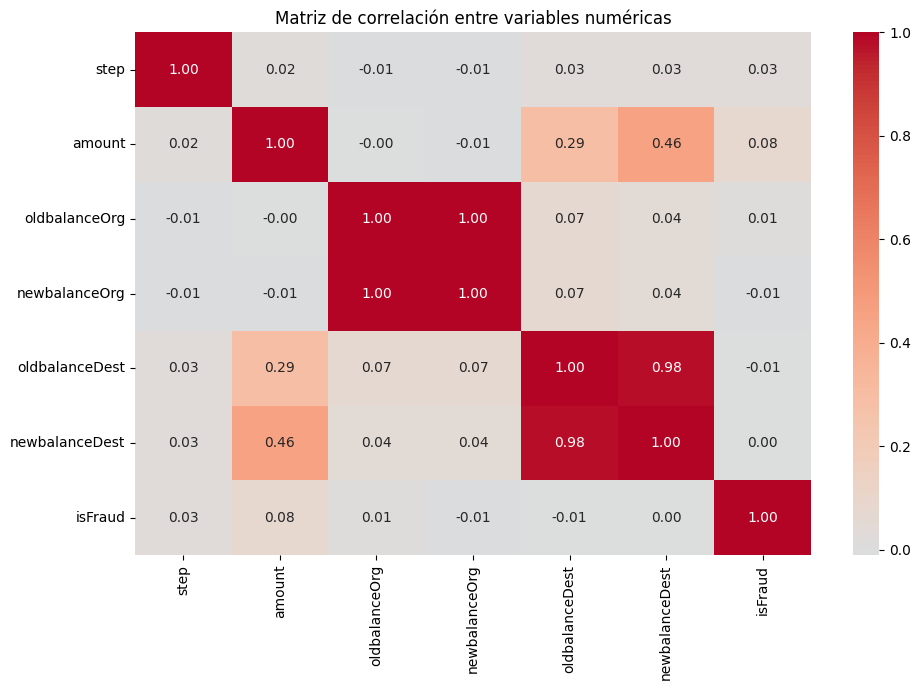

,step,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrg,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


In [ ]:
# Selección de variables numéricas relevantes
num_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
corr = fraud_detection[num_cols].corr()

# Heatmap de correlaciones
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlación entre variables numéricas")
plt.tight_layout()
plt.show()

corr


### **Observación**

Se observa una correlación positiva muy alta entre las variables de origen (**oldbalanceOrg** y **newbalanceOrg**) y entre las variables de destino (**oldbalanceDest** y **newbalanceDest**). Esto indica que, en esencia, cada par aporta prácticamente la misma información, algo que ya habíamos identificado previamente.

En cuanto a **amount**, se relaciona de manera más fuerte con las variables de destino que con las de origen, lo cual confirma el patrón observado: muchas transacciones presentan comportamientos poco coherentes respecto a los saldos iniciales.

Finalmente, la variable **isFraud** no presenta una correlación significativa con ninguna de las demás variables de forma individual.



# **Conclusión final del análisis**

La base de datos presenta inconsistencias notables: en la mayoría de los casos, los balances de origen y destino no corresponden al **amount** de la transacción, lo que reduce la confiabilidad de las variables.

Variables como **isFlaggedFraud**, **nameOrig** y **nameDest** no aportan valor predictivo significativo debido a su baja representatividad, por lo que fueron descartadas.

El fraude es un evento extremadamente raro, con solo alrededor de **8,000** casos, y se presenta únicamente en los tipos de transacción **CASH_OUT** y **TRANSFER**, lo que implica un fuerte desbalance de clases que debe ser abordado en la fase de modelado.

Los fraudes tienden a ocurrir en operaciones con montos significativamente más altos que las legítimas, elevando la media de manera desproporcionada respecto a la mediana.

Después del **step 400**, el volumen de transacciones cae considerablemente, mientras que la cantidad de fraudes se mantiene casi constante (entre 10 y 20 por hora).

Existe una alta correlación entre las variables de saldo (**oldbalanceOrg/newbalanceOrg** y **oldbalanceDest/newbalanceDest**), lo que indica redundancia.

Se identifican fuertes anomalías en la base de datos que deben ser consideradas durante el análisis y modelado.

# **Desarrollo del Modelo Predictivo**

## **Importación de librerías y métricas**

In [ ]:
# Scikit Learn para el Modelo
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (
    KFold,
    cross_val_score,
    ShuffleSplit,
    train_test_split
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

## **Preprocesamiento de datos**


In [ ]:
fraud_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 14 columns):
 #   Column           Dtype   
---  ------           -----   
 0   step             float64 
 1   type             category
 2   amount           float64 
 3   oldbalanceOrg    float64 
 4   newbalanceOrg    float64 
 5   oldbalanceDest   float64 
 6   newbalanceDest   float64 
 7   isFraud          bool    
 8   amount_dest      float64 
 9   amount_org       float64 
 10  amount_val_org   bool    
 11  amount_val_dest  bool    
 12  amount_val       bool    
 13  type_num         category
dtypes: bool(4), category(2), float64(8)
memory usage: 424.8 MB


## **Codificación de la variable categórica Type**

In [ ]:
#Asignamos enteros a cada tipo de transacción y creamos una nueva columna llamada type_num

type_values = {"PAYMENT":1, "TRANSFER":2, "CASH_OUT":3, "DEBIT":4, "CASH_IN":5}
fraud_detection["type_num"] = fraud_detection["type"].map(type_values)

## **Selección y clasificación de variables**

In [ ]:
# Clasificamos cada columna como numérica o categórica, y agregamos type_num

cols_numeric = ['amount', 'oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest', 'amount_dest','amount_org','type_num']

cols_categoric = [ 'amount_val_org', 'amount_val_dest', 'amount_val']


## **Pipelines y transformaciones**

In [ ]:
# Transformaciones numéricas, StandarScaler
numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

# Transformaciones categóricas, OneHotEnconder
categorical_transformer = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Preprocesador para modelos lineales, con el ColumnTransformer
preprocesador_lineal = ColumnTransformer([
    ("num", numeric_transformer, cols_numeric),
    ("cat", categorical_transformer, cols_categoric)
])

# Preprocesador para modelos basados en árboles, con el ColumnTransformer
preprocesador_trees = ColumnTransformer([
    ("num", "passthrough", cols_numeric),  # numéricas tal cual
])

In [ ]:
preprocesador_lineal

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['amount', 'oldbalanceOrg', 'newbalanceOrg',
                                  'oldbalanceDest', 'newbalanceDest',
                                  'amount_dest', 'amount_org', 'type_num']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['amount_val_org', 'amount_val_dest',
                                  'amount_val'])])

In [ ]:
preprocesador_trees

ColumnTransformer(transformers=[('num', 'passthrough',
                                 ['amount', 'oldbalanceOrg', 'newbalanceOrg',
                                  'oldbalanceDest', 'newbalanceDest',
                                  'amount_dest', 'amount_org', 'type_num'])])

## **Split de datos: train, test y el shape**

In [ ]:
# Separación de variables predictoras (X) y variable objetivo (y, "isFraud")
X_features = fraud_detection.drop('isFraud', axis='columns')
Y_target = fraud_detection['isFraud']

# Hacemos el split entre X y Y (70/30)
x_train, x_test, y_train, y_test = train_test_split(
    X_features, Y_target, test_size = 0.3,random_state=42
)

# Checamos el shape de las variables de entreno y prueba X, Y
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4453834, 13)
(4453834,)
(1908786, 13)
(1908786,)


In [ ]:
print(x_test.head())

          step      type      amount  oldbalanceOrg  newbalanceOrg  oldbalanceDest  newbalanceDest  amount_dest  amount_org  amount_val_org  amount_val_dest  amount_val type_num
3737323  278.0   CASH_IN   330218.42       20866.00      351084.42       452419.57       122201.15   -330218.42  -330218.42           False            False       False        5
264914    15.0   PAYMENT    11647.08       30370.00       18722.92            0.00            0.00         0.00    11647.08           False            False       False        1
85647     10.0   CASH_IN   152264.21      106589.00      258853.21       201303.01        49038.80   -152264.21  -152264.21           False            False       False        5
5899326  403.0  TRANSFER  1551760.63           0.00           0.00      3198359.45      4750120.08   1551760.63        0.00           False             True       False        2
2544263  206.0   CASH_IN    78172.30     2921331.58     2999503.88       415821.90       337649.60    -78172.3

### **Observación**

Podemos confirmar que la variable x_test si nos exluye nuestro target y que es las variable "**isFraud**"

In [ ]:
print(y_train.head())

2408104    False
662430     False
496595     False
5053741    False
755621     False
Name: isFraud, dtype: bool


In [ ]:
print(y_test.value_counts())


isFraud
False    1906351
True        2435
Name: count, dtype: int64


## **Resultados de aplicar .fit() a los preprocesadores**

In [ ]:
preprocesador_trees.fit(x_train)

ColumnTransformer(transformers=[('num', 'passthrough',
                                 ['amount', 'oldbalanceOrg', 'newbalanceOrg',
                                  'oldbalanceDest', 'newbalanceDest',
                                  'amount_dest', 'amount_org', 'type_num'])])

In [ ]:
preprocesador_lineal.fit(x_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['amount', 'oldbalanceOrg', 'newbalanceOrg',
                                  'oldbalanceDest', 'newbalanceDest',
                                  'amount_dest', 'amount_org', 'type_num']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['amount_val_org', 'amount_val_dest',
                                  'amount_val'])])

## **Lista de features generados por el preprocesador - Para Regresión Lineal**

In [ ]:
# Hacemos .get_features_names_out para obtener los nombres de las variables transformadas
feature_names1 = preprocesador_lineal.get_feature_names_out()
feature_names1

array(['num__amount', 'num__oldbalanceOrg', 'num__newbalanceOrg',
       'num__oldbalanceDest', 'num__newbalanceDest', 'num__amount_dest',
       'num__amount_org', 'num__type_num', 'cat__amount_val_org_False',
       'cat__amount_val_org_True', 'cat__amount_val_dest_False',
       'cat__amount_val_dest_True', 'cat__amount_val_False',
       'cat__amount_val_True'], dtype=object)

In [ ]:
# Transformación
x_test_transformed = preprocesador_lineal.transform(x_test)

x_test_transformed = pd.DataFrame(x_test_transformed, columns=feature_names1)

x_test_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908786 entries, 0 to 1908785
Data columns (total 14 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   num__amount                 float64
 1   num__oldbalanceOrg          float64
 2   num__newbalanceOrg          float64
 3   num__oldbalanceDest         float64
 4   num__newbalanceDest         float64
 5   num__amount_dest            float64
 6   num__amount_org             float64
 7   num__type_num               float64
 8   cat__amount_val_org_False   float64
 9   cat__amount_val_org_True    float64
 10  cat__amount_val_dest_False  float64
 11  cat__amount_val_dest_True   float64
 12  cat__amount_val_False       float64
 13  cat__amount_val_True        float64
dtypes: float64(14)
memory usage: 203.9 MB


## **Lista de features generados por el preprocesador - Para Random Forest**

In [ ]:
# Hacemos .get_features_names_out para obtener los nombres de las variables transformadas
feature_names2 = preprocesador_trees.get_feature_names_out()
feature_names2

array(['num__amount', 'num__oldbalanceOrg', 'num__newbalanceOrg',
       'num__oldbalanceDest', 'num__newbalanceDest', 'num__amount_dest',
       'num__amount_org', 'num__type_num'], dtype=object)

In [ ]:
# Transformación
x_test_transformed = preprocesador_trees.transform(x_test)

x_test_transformed = pd.DataFrame(x_test_transformed, columns=feature_names2)

x_test_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908786 entries, 0 to 1908785
Data columns (total 8 columns):
 #   Column               Dtype  
---  ------               -----  
 0   num__amount          float64
 1   num__oldbalanceOrg   float64
 2   num__newbalanceOrg   float64
 3   num__oldbalanceDest  float64
 4   num__newbalanceDest  float64
 5   num__amount_dest     float64
 6   num__amount_org      float64
 7   num__type_num        float64
dtypes: float64(8)
memory usage: 116.5 MB


## **Creación de una función para métricas (precisión, recall y f1)**

In [ ]:
# Llamamos a esta función resumen_clasificacion

def resumen_clasificacion(y_test, y_pred):
  prec = precision_score(y_test, y_pred)
  rec = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  return {'precisión': prec, 'recall': rec, 'f1': f1}

print(resumen_clasificacion)

<function resumen_clasificacion at 0x780e0c7c9580>


## **Diccionario de modelos con sus hiperparámetros**

* Para **Random Forest** y **Regresión Logística**, se utiliza **class_weight="balanced"** debido al desbalance en la base de datos, con el fin de compensar este efecto.

* Se redujo la cantidad de iteraciones para **Logistic Regression** para optimizar el tiempo de entrenamiento.

* Se definió el parámetro **n_estimators** para ajustar la duración del entrenamiento en Random **Forest**.




In [ ]:
modelos = {
    'RandomForest': RandomForestClassifier(class_weight="balanced", n_estimators = 20, max_features = None, random_state=42),
    'RegresionLogistica': LogisticRegression(class_weight="balanced", max_iter= 200,random_state=42  )
}

## **Creación de pipelines para cada modelo**

In [ ]:
# Creamos pipelines para cada modelo con escalado y el OneHot, a patir del diccionario de modelos que creamos arriba

pipelines = {}

for modelo_nombre, modelo in modelos.items():
    # Pipeline StandardScaler
    pipelines[f'{modelo_nombre}_standarScaler'] = Pipeline([
        ('preprocesamiento', preprocesador_lineal),
        ('clasificador', modelo)
    ])

    # Pipeline OneHotEncoder
    pipelines[f'{modelo_nombre}_OHE'] = Pipeline([
        ('preprocesamiento', preprocesador_trees),
        ('clasificador', modelo)
    ])



## **Entrenamiento y evaluación de los pipelines**

In [ ]:
resultados = {}

for nombre_pipeline, pipeline in pipelines.items():
  pipeline.fit(x_train, y_train)
  y_pred = pipeline.predict(x_test)
  resultados[nombre_pipeline] = resumen_clasificacion(y_test, y_pred)


## **Visualización preliminar de métricas con pprint**

In [ ]:
import pprint
print("Resumen de Métricas para Cada Pipeline:\n")
pprint.pprint(resultados)

Resumen de Métricas para Cada Pipeline:

{'RandomForest_OHE': {'f1': 0.899548289954829,
                      'precisión': 0.9444444444444444,
                      'recall': 0.8587268993839836},
 'RandomForest_standarScaler': {'f1': 0.9975308641975309,
                                'precisión': 0.9995876288659794,
                                'recall': 0.995482546201232},
 'RegresionLogistica_OHE': {'f1': 0.04803632961365555,
                            'precisión': 0.02470454305397444,
                            'recall': 0.864476386036961},
 'RegresionLogistica_standarScaler': {'f1': 0.09624478442280945,
                                      'precisión': 0.05056895291784111,
                                      'recall': 0.9946611909650924}}


## **Resultados de métricas en DataFrame transpuesto**

In [ ]:
# Asignamos los resultados de las maetricas al df_resultados transpuestos
df_resultados = pd.DataFrame(resultados).T
df_resultados.sort_values(by="recall", ascending=True)
df_resultados

,precisión,recall,f1
RandomForest_standarScaler,0.999588,0.995483,0.997531
RandomForest_OHE,0.944444,0.858727,0.899548
RegresionLogistica_standarScaler,0.050569,0.994661,0.096245
RegresionLogistica_OHE,0.024705,0.864476,0.048036


### **Observación**

Teniendo en cuenta los resultados de las métricas, especialmente **precisión** y **recall**, el modelo que mejor se ajusta es **RandomForestClassifier** con preprocesamiento mediante **OneHotEncoder**. Este modelo mantiene un equilibrio adecuado entre **precisión (0.9444)**, **recall (0.8587)** y **F1-score (0.8995)**. Aunque el pipeline con **StandardScaler** alcanzó valores ligeramente superiores, la diferencia no es significativa, por lo que **RandomForest_OHE** representa una alternativa sólida con un preprocesamiento más sencillo.

# **Conclusiones finales**

**1. Análisis de Variables**

- Se identificaron posibles inconsistencias entre los saldos de origen y destino, lo que sugiere que el dataset podría ser sintético.

- La variable **type** de transacción resulta determinante, ya que ciertas categorías concentran gran parte de los fraudes. La variable **isFraud** no presenta correlaciones lineales fuertes con los montos, lo que indica la necesidad de emplear modelos no lineales.

- Los boxplots y la estadística descriptiva evidenciaron transacciones atípicas que, aunque poco frecuentes, son relevantes para el análisis de fraude.

**2. Preprocesamiento**

- Se eliminaron registros duplicados y se confirmó la ausencia de valores faltantes en las variables críticas.

- En lugar de aplicar técnicas de sobremuestreo como SMOTE, se utilizó el parámetro **class_weight="balanced"** en **RandomForest** y **Regresión Logística**, lo que ajusta automáticamente los pesos de cada clase según su frecuencia.
 - Esta estrategia permitió dar mayor relevancia a la clase minoritaria (fraudes) sin alterar la distribución original de los datos.

**3. Modelado**

Se desarrollaron modelos de **RandomForestClassifier** y **LogisticRegression**, ambos configurados con **class_weight="balanced"**. Gracias a este ajuste, los modelos redujeron el sesgo hacia la clase mayoritaria y mejoraron la detección de fraudes.

Por su robustez, equilibrio entre métricas y mayor capacidad de generalización en producción, el modelo seleccionado fue **RandomForest** con **One Hot Encoding** (**OHE**).
Esta elección privilegia un modelo que, aunque no sea “perfecto” en las métricas, resulta más confiable frente a nuevos datos y reduce el riesgo de degradación del desempeño en escenarios reales.

Este modelo constituye una base sólida para la implementación de un sistema de detección de fraudes, al equilibrar adecuadamente **precisión** (minimización de falsos positivos) y **recall** (maximización de la detección de fraudes).
